In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
inputfile = pd.read_csv('Company_Financial_KPI.CSV') # Reading Company financial KPI csv files.
inputfile

,company,prd_line,product,customer,profit,revenue,year
0,A,Phone,Prepaid,5070,1400,24000,2017
1,A,Phone,Postpaid,6670,5200,85200,2017
2,A,Phone,Landline,3760,2653,22653,2017
3,A,Internet,Broadband,723,996,1996,2017
4,A,Internet,4G,810,296,2996,2017
5,A,Internet,3G,1243,496,4996,2017
6,A,Phone,Prepaid,2970,1867,8867,2018
7,A,Phone,Postpaid,670,943,4043,2018
8,A,Phone,Landline,7670,5705,13705,2018
9,A,Internet,Broadband,3670,1540,6540,2018


In [22]:
total_revenue = inputfile['revenue'].groupby([inputfile['company'],inputfile['year']]).sum() # Grouping record according to Company and year so I can calculate Total Revenue.
total_revenue = pd.DataFrame(total_revenue)
total_revenue

revenue
company year         
A       2017   141841
        2018    62185

In [23]:
total_profit = inputfile['profit'].groupby([inputfile['company'],inputfile['year']]).sum() # Grouping record according to Company and year so I can calculate Total profit.
total_profit = pd.DataFrame(total_profit)
total_profit

profit
company year        
A       2017   11041
        2018   18485

In [24]:
total_customer = inputfile['customer'].groupby([inputfile['company'],inputfile['year']]).sum() # Grouping record according to Company and year so I can calculate Total Customers.
total_customer = pd.DataFrame(total_customer)
total_customer

customer
company year          
A       2017     18276
        2018     25320

In [25]:
product_line_profit = inputfile['profit'].groupby([inputfile['prd_line'],inputfile['product'],inputfile['year']]).max()  # Profit by product Line with filter on specific product
product_line_profit = pd.DataFrame(product_line_profit)
product_line_profit

profit
prd_line product   year        
Internet 3G        2017     496
                   2018    7850
         4G        2017     296
                   2018     580
         Broadband 2017     996
                   2018    1540
Phone    Landline  2017    2653
                   2018    5705
         Postpaid  2017    5200
                   2018     943
         Prepaid   2017    1400
                   2018    1867

In [26]:
product_line_profit_by_year = inputfile['profit'].groupby([inputfile['year']]).sum() # Grouping profit according to financial year.
product_line_profit_by_year
product_line_profit_by_yr = pd.DataFrame(product_line_profit_by_year)
product_line_profit_by_yr

,profit
year,
2017,11041
2018,18485


In [27]:
Complete_revenue = inputfile['revenue'].groupby(inputfile['company']).sum() # Grouping record according to Company so I can calculate Total Revenue(including all years).
Complete_revenue = pd.DataFrame(Complete_revenue)
Complete_revenue

,revenue
company,
A,204026


In [28]:
#Performance of the company (good/bad/ok)
profit_ok = 9000
profit_good = 18000
for year, profit in product_line_profit_by_year.iteritems():
    if profit < profit_ok :
        print('Company performance is BAD in the year', year , 'Total Profit of the year is ' , profit)     
    elif profit_ok < profit < profit_good:
        print('Company performance is OK in the year', year , 'Total Profit of the year is ' , profit)
    elif profit > profit_good:
        print('Company performance is GOOD in the year', year , 'Total Profit of the year is ' , profit)

Company performance is OK in the year 2017 Total Profit of the year is  11041
Company performance is GOOD in the year 2018 Total Profit of the year is  18485


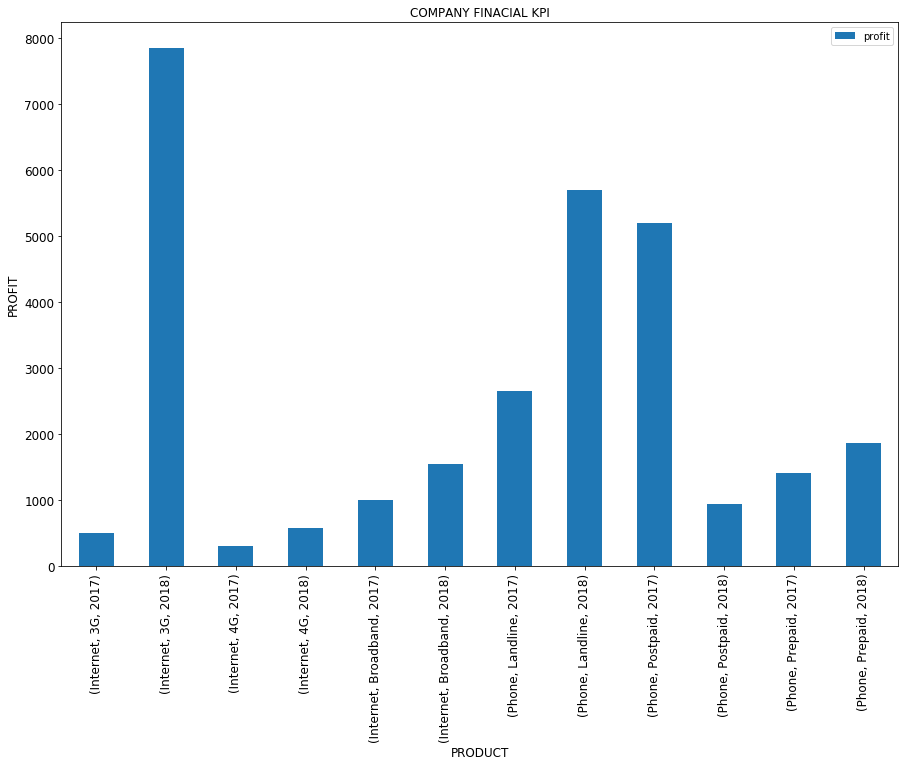

In [29]:
ax = product_line_profit.plot(kind='bar', title ="COMPANY FINACIAL KPI",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("PRODUCT",fontsize=12)
ax.set_ylabel("PROFIT",fontsize=12)
plt.show()

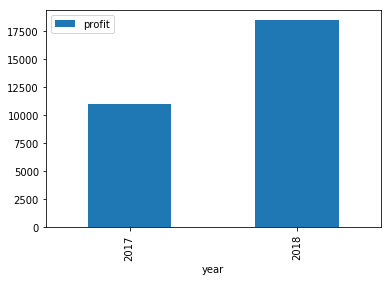

In [19]:
product_line_profit_by_yr.plot.bar()
plt.show()